<a href="https://colab.research.google.com/github/fisicorj/Astrophysics/blob/main/pendulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

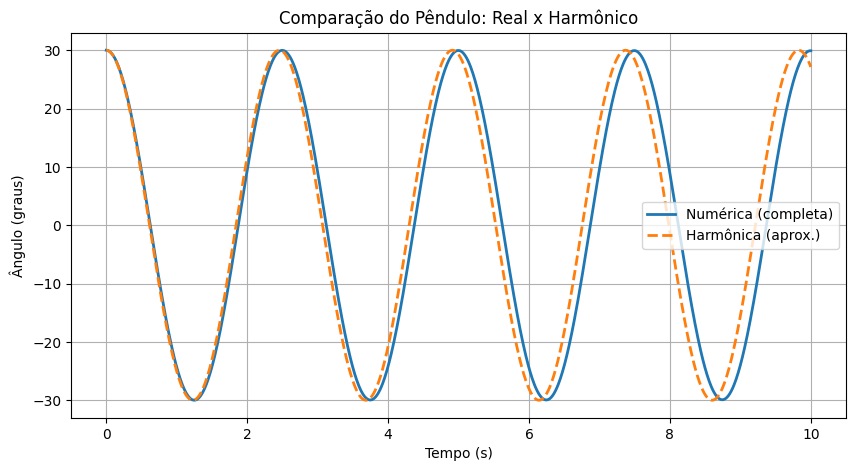

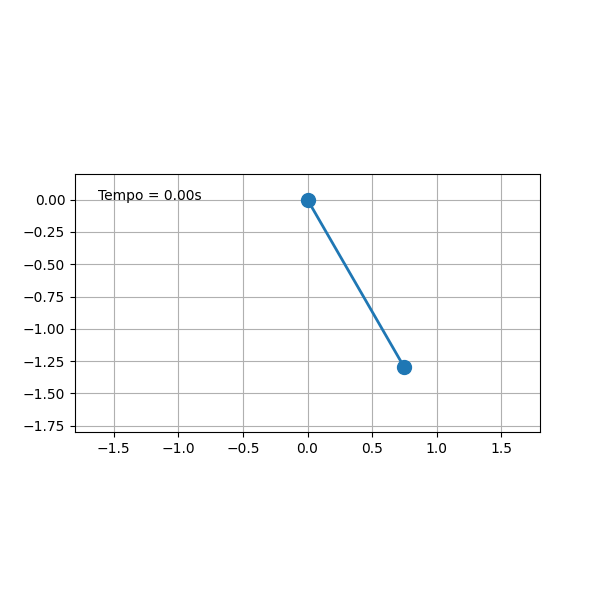

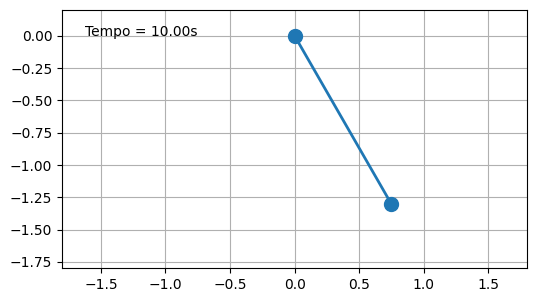

In [1]:
# %matplotlib inline  #adicionar os espações de fase como desenho.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.integrate import solve_ivp
from IPython.display import Image

# === Parâmetros do pêndulo ===
g = 9.81            # Aceleração da gravidade (m/s²)
L = 1.5             # Comprimento do fio do pêndulo (m)
theta0 = np.radians(30)  # Ângulo inicial do pêndulo (graus -> radianos)
omega0 = 0.0             # Velocidade angular inicial (rad/s)

# === Equação do pêndulo em forma de sistema de 1ª ordem ===
# y[0] = theta (ângulo), y[1] = omega (velocidade angular)
def pendulo(t, y):
    return [y[1], - (g / L) * np.sin(y[0])]

# === Tempo de simulação ===
t_eval = np.linspace(0, 10, 1000)  # 1000 pontos de t = 0 a t = 10 segundos

# === Solução numérica da EDO com solve_ivp ===
sol = solve_ivp(pendulo, (0, 10), [theta0, omega0], t_eval=t_eval)

# === Solução harmônica (para comparação, válida para pequenos ângulos) ===
omega = np.sqrt(g / L)                      # Frequência angular natural do pêndulo
theta_harm = theta0 * np.cos(omega * t_eval)  # Solução da aproximação linear

# === Plotando a comparação entre solução numérica e harmônica ===
plt.figure(figsize=(10,5))
plt.plot(t_eval, np.degrees(sol.y[0]), label="Numérica (completa)", lw=2)  # Solução real
plt.plot(t_eval, np.degrees(theta_harm), '--', label="Harmônica (aprox.)", lw=2)  # Aproximação
plt.title("Comparação do Pêndulo: Real x Harmônico")
plt.xlabel("Tempo (s)")
plt.ylabel("Ângulo (graus)")
plt.grid(True)
plt.legend()
plt.show()

# === Cálculo da posição da massa do pêndulo (x, y) no tempo ===
x = L * np.sin(sol.y[0])   # x(t) = L * sen(theta)
y = -L * np.cos(sol.y[0])  # y(t) = -L * cos(theta)

# === Preparação da figura para animação ===
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(-1.2*L, 1.2*L)  # Limites do eixo x
ax.set_ylim(-1.2*L, 0.2)    # Limites do eixo y (pêndulo pendurado)
ax.set_aspect('equal')      # Aspecto igual (círculos parecem círculos)
ax.grid()

# Criamos uma linha com bola (massa + fio)
line, = ax.plot([], [], 'o-', lw=2, markersize=10)  # fio + bolinha
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)  # texto do tempo no canto da tela

# === Inicialização da animação ===
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

# === Atualização da animação a cada frame ===
def update(i):
    line.set_data([0, x[i]], [0, y[i]])  # atualiza posição do fio e da bolinha
    time_text.set_text(f'Tempo = {t_eval[i]:.2f}s')  # mostra o tempo no gráfico
    return line, time_text

# === Criação da animação ===
ani = FuncAnimation(fig, update, frames=len(t_eval), init_func=init,
                    interval=10, blit=True)  # interval=10ms entre frames (~100 FPS)

# === Salva a animação como GIF e exibe no notebook ===
ani.save("pendulo.gif", writer=PillowWriter(fps=30))  # salva com 30 frames por segundo
Image(filename="pendulo.gif")  # exibe a animação no output do Colab

